##  Lab: 10
## Name : Mahboob ALi
## Roll Number:119
## Sap ID: 5000000302
## Section: C


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler



In [3]:

# Step 2: Load the Iris Dataset
# Load the Iris dataset
iris = load_iris()

# Convert the dataset into a DataFrame for easier manipulation
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Show the first few rows of the dataset
print("First 5 rows of the Iris dataset:")
print(iris_data.head())
print("\n")


First 5 rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2




In [4]:

# Step 3: Data Preprocessing
# The K-Means algorithm works better if all data is on the same scale.
# We will 'scale' the data to make sure everything is treated equally.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris_data)

print("Data after scaling (first 5 rows):")
print(X_scaled[:5])
print("\n")

Data after scaling (first 5 rows):
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]




D:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

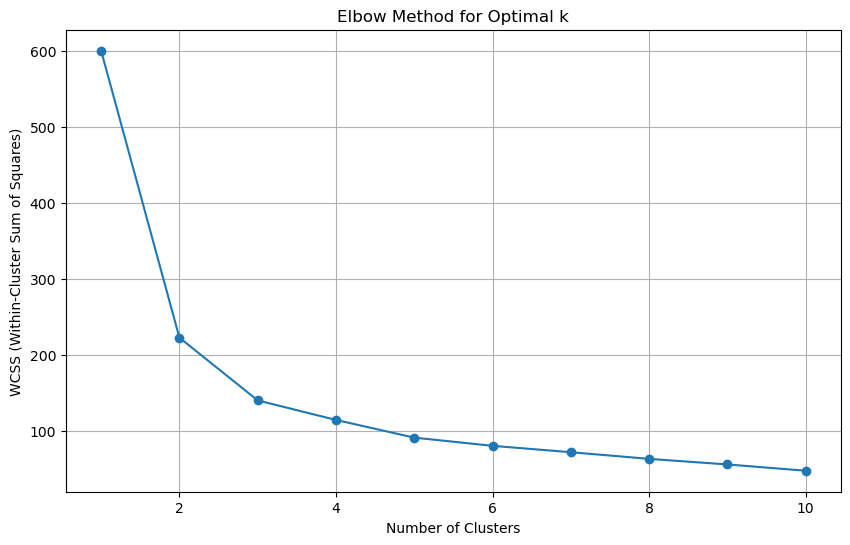

In [5]:

# Step 4: Use the Elbow Method to Find the Best Number of Clusters
# Elbow method to find optimal k
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):  # Test k from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [6]:

# Step 5: Apply K-Means with Optimal Clusters
# Based on the elbow method, we choose k=3 for the Iris dataset
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

print(f"K-Means clustering completed with {optimal_k} clusters")
print("Cluster labels for first 10 data points:", y_kmeans[:10])
print("\n")

K-Means clustering completed with 3 clusters
Cluster labels for first 10 data points: [1 1 1 1 1 1 1 1 1 1]




D:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


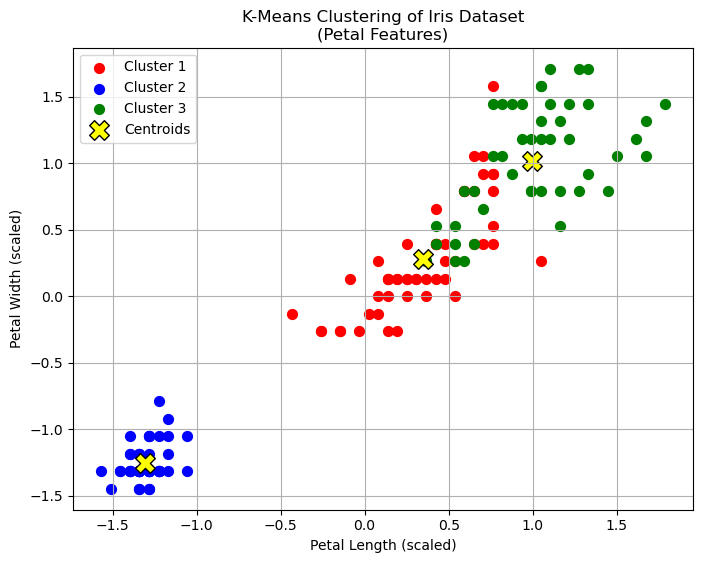

In [7]:
# Step 6: Visualize the Clusters - Single Plot (Petal Features)
plt.figure(figsize=(8, 6))

colors = ['red', 'blue', 'green']
for i in range(optimal_k):
    plt.scatter(X_scaled[y_kmeans == i, 2], X_scaled[y_kmeans == i, 3],
                s=50, c=colors[i], label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],
            s=200, c='yellow', marker='X', label='Centroids', edgecolors='black')

plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.title('K-Means Clustering of Iris Dataset\n(Petal Features)')
plt.legend()
plt.grid(True)
plt.show()

In [8]:

# Step 7: Analyze the Results
# Add the cluster labels to the original dataset
iris_data['Cluster'] = y_kmeans

# Show the average values for each feature per cluster
cluster_means = iris_data.groupby('Cluster').mean()
print("Average values for each feature per cluster:")
print(cluster_means)
print("\n")

# Count the number of flowers in each cluster
cluster_counts = iris_data['Cluster'].value_counts().sort_index()
print("Number of flowers in each cluster:")
print(cluster_counts)
print("\n")


Average values for each feature per cluster:
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                 5.801887          2.673585           4.369811   
1                 5.006000          3.428000           1.462000   
2                 6.780851          3.095745           5.510638   

         petal width (cm)  
Cluster                    
0                1.413208  
1                0.246000  
2                1.972340  


Number of flowers in each cluster:
Cluster
0    53
1    50
2    47
Name: count, dtype: int64


